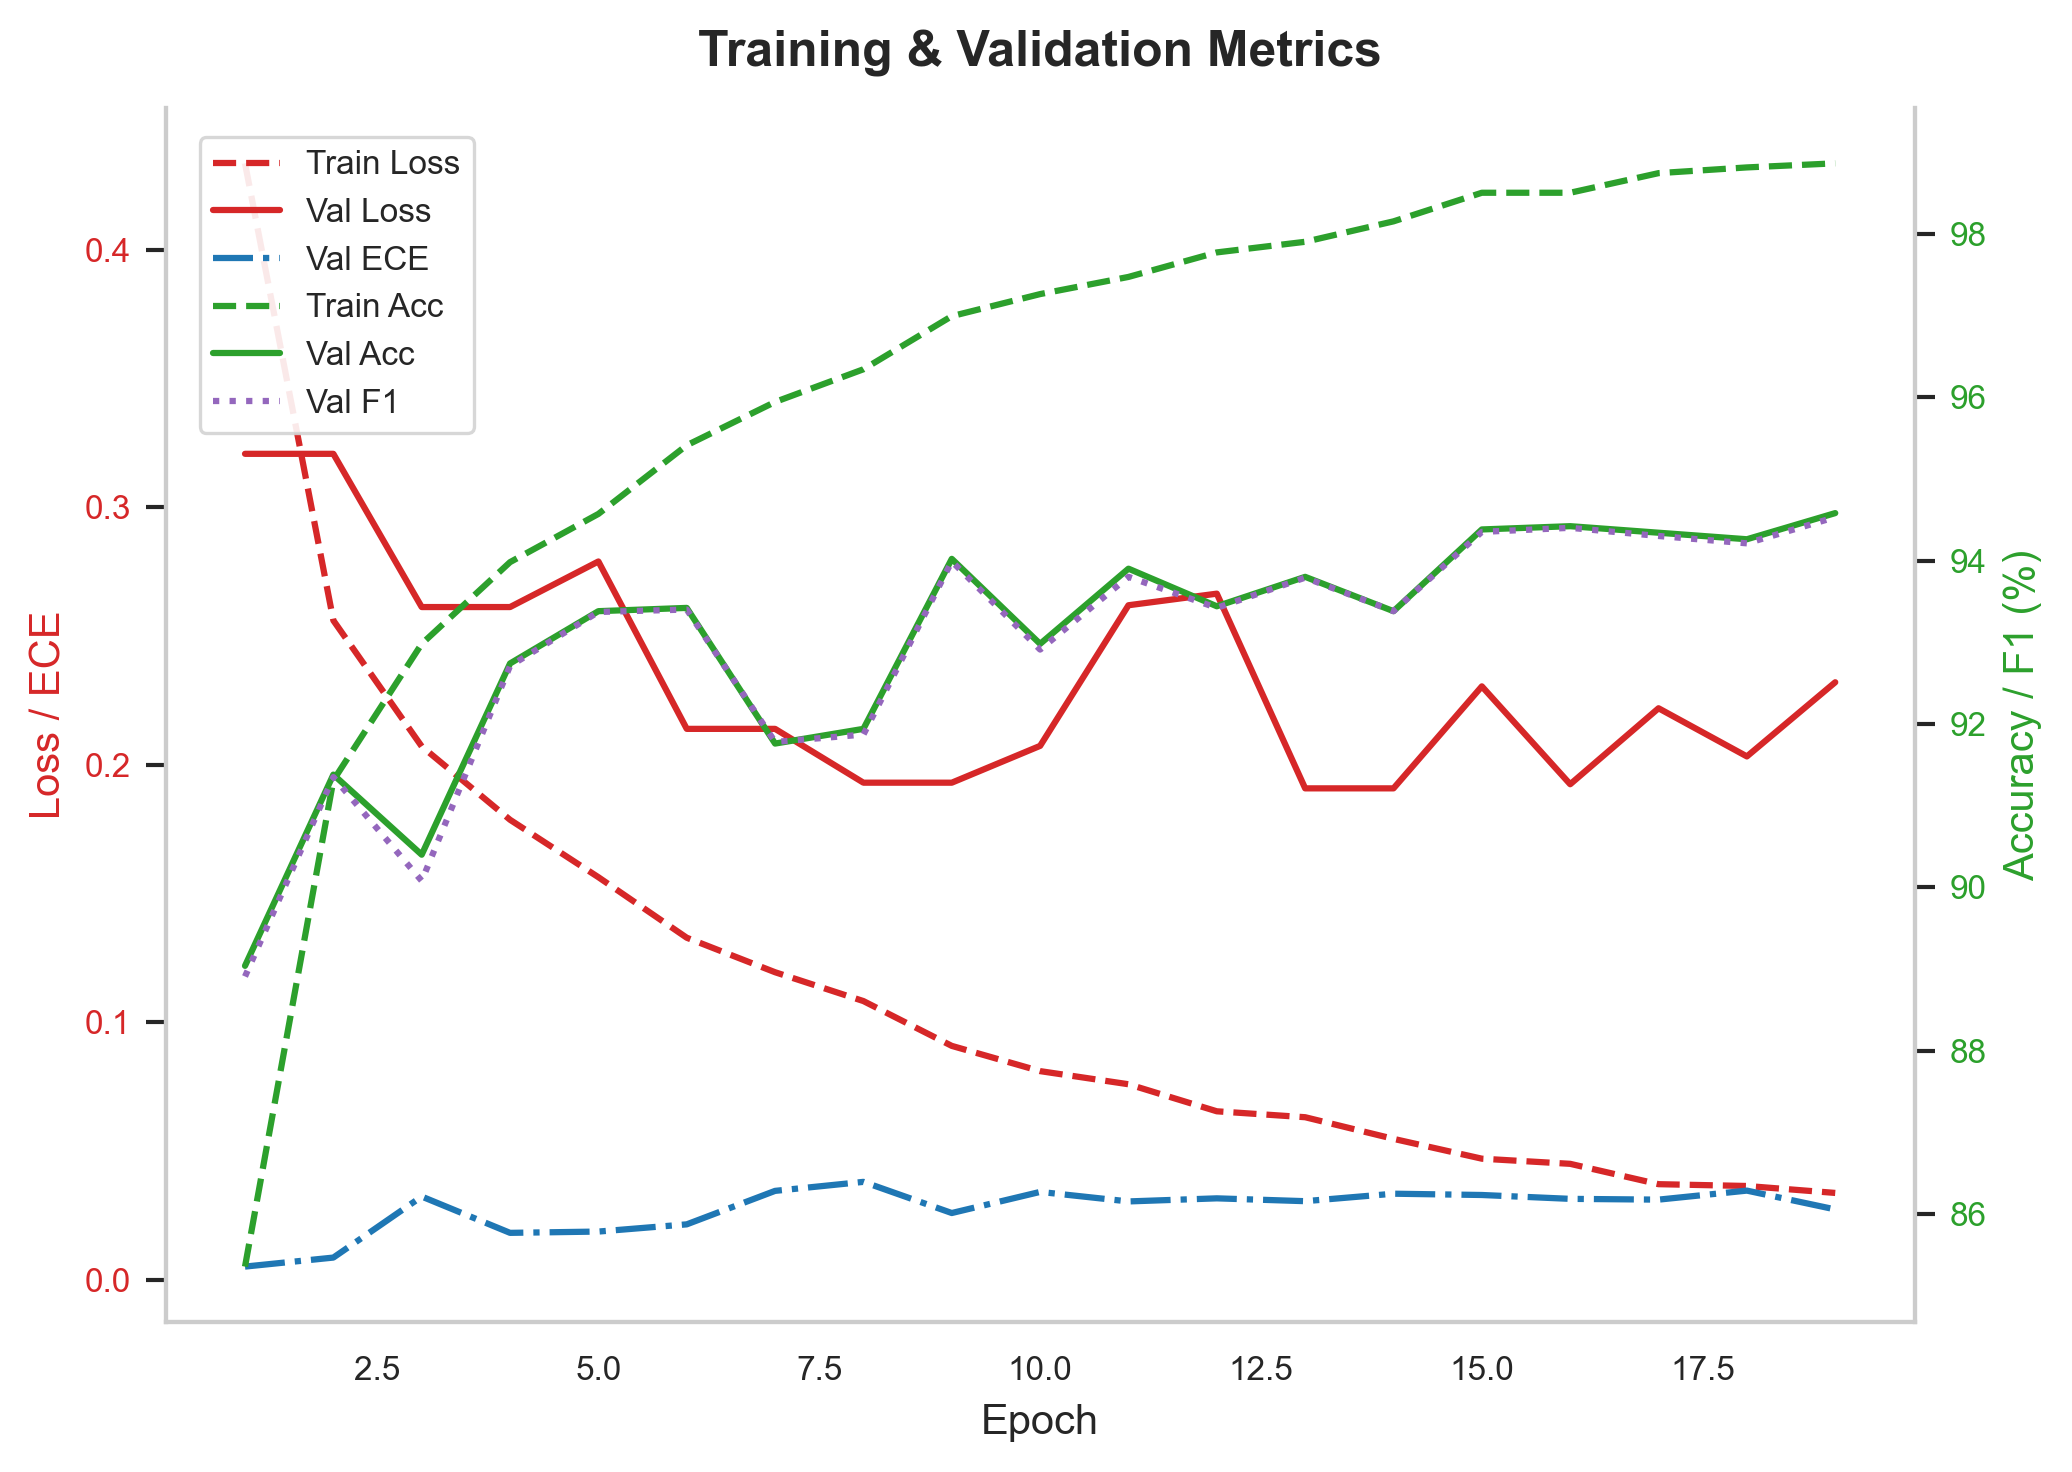

Done! Plotted metrics from your log to: C:/Users/Gading/Downloads/Research/Results/ViT/vit_metrics_seaborn.png


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

def plot_all_metrics_seaborn(history, save_path=None):
    """
    Plots train/val loss, val ECE, train/val accuracy, and val F1 in a single figure
    using Seaborn for a sleek, professional style.
    
    history should be a dictionary with:
      - 'epochs': list of epoch indices
      - 'train_loss': list of floats
      - 'val_loss': list of floats
      - 'val_ece': list of floats
      - 'train_acc': list of floats
      - 'val_acc': list of floats
      - 'val_f1': list of floats

    Lines only (no markers). The legend is a small box in the top-left corner,
    and the title is placed at the top. 
    """

    # 1. Set Seaborn theme - use a more professional theme
    sns.set_theme(style="whitegrid", context="paper")
    sns.set_style({"axes.grid": False})  # Remove grid for cleaner look

    epochs = history['epochs']

    # 2. Create figure and axes
    fig, ax1 = plt.subplots(figsize=(7, 5))

    # 3. Title on top with a bit of padding
    plt.title("Training & Validation Metrics", pad=10, fontsize=12, fontweight='bold')

    # 4. Left axis for Loss / ECE
    color_loss = '#d62728'  # More professional red
    ax1.set_xlabel('Epoch', fontsize=10)
    ax1.set_ylabel('Loss / ECE', color=color_loss, fontsize=10)

    # -- Lines only, no markers --
    l1 = ax1.plot(
        epochs, history['train_loss'], 
        label='Train Loss', color=color_loss, linestyle='--', linewidth=1.5
    )
    l2 = ax1.plot(
        epochs, history['val_loss'], 
        label='Val Loss', color=color_loss, linestyle='-', linewidth=1.5
    )
    color_ece = '#1f77b4'  # More professional blue
    l3 = ax1.plot(
        epochs, history['val_ece'], 
        label='Val ECE', color=color_ece, linestyle='-.', linewidth=1.5
    )

    ax1.tick_params(axis='y', labelcolor=color_loss, labelsize=8)
    ax1.tick_params(axis='x', labelsize=8)

    # 5. Right axis for Accuracy / F1
    ax2 = ax1.twinx()
    color_acc = '#2ca02c'  # More professional green
    ax2.set_ylabel('Accuracy / F1 (%)', color=color_acc, fontsize=10)

    l4 = ax2.plot(
        epochs, history['train_acc'], 
        label='Train Acc', color=color_acc, linestyle='--', linewidth=1.5
    )
    l5 = ax2.plot(
        epochs, history['val_acc'], 
        label='Val Acc', color=color_acc, linestyle='-', linewidth=1.5
    )
    color_f1 = '#9467bd'  # More professional purple
    f1_percent = [f * 100 for f in history['val_f1']]
    l6 = ax2.plot(
        epochs, f1_percent, 
        label='Val F1', color=color_f1, linestyle=':', linewidth=1.5
    )

    ax2.tick_params(axis='y', labelcolor=color_acc, labelsize=8)

    # 6. Combine legend lines
    lines = l1 + l2 + l3 + l4 + l5 + l6
    labels = [line.get_label() for line in lines]

    # 7. Small legend box in the top-left corner with cleaner styling
    ax1.legend(
        lines, labels,
        loc='upper left',
        bbox_to_anchor=(0.01, 0.99),  # Tighter to the corner
        fontsize=8,  # Smaller for more professional look
        frameon=True,
        framealpha=0.9,  # Slightly transparent
        edgecolor='lightgray'
    )

    # 8. Improve aesthetics
    fig.tight_layout(pad=1.1)
    sns.despine(left=False, bottom=False, right=False)  # Keep all spines for cleaner look
    
    # 9. Save and show
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

def parse_training_log_with_epoch(log_file_path):
    """
    Parse a training log file to extract epochs and metrics.
    Returns a dictionary with training history.
    """
    # Initialize empty lists for metrics
    epochs = []
    train_loss = []
    val_loss = []
    val_ece = []
    train_acc = []
    val_acc = []
    val_f1 = []
    
    try:
        with open(log_file_path, 'r') as f:
            lines = f.readlines()
        
        # Find the last occurrence of "Epoch 1/50" to ensure we're parsing only the most recent run
        last_start_index = 0
        for i, line in enumerate(lines):
            if "Epoch 1/50" in line:
                last_start_index = i
        
        # Process lines from the last start of training
        for line in lines[last_start_index:]:
            # Extract epoch numbers
            epoch_match = re.search(r'Epoch (\d+)/\d+', line)
            if epoch_match:
                epoch_num = int(epoch_match.group(1))
                if epoch_num not in epochs:
                    epochs.append(epoch_num)
            
            # Extract metrics - handle the format in the log carefully
            if 'Train Loss:' in line:
                train_loss_match = re.search(r'Train Loss: ([\d\.]+)', line)
                if train_loss_match:
                    train_loss.append(float(train_loss_match.group(1)))
            
                # Also extract Train Acc from the same line
                train_acc_match = re.search(r'Train Acc: ([\d\.]+)%', line)
                if train_acc_match:
                    train_acc.append(float(train_acc_match.group(1)))
            
            if 'Val Loss:' in line:
                val_loss_match = re.search(r'Val Loss: ([\d\.]+)', line)
                if val_loss_match:
                    val_loss.append(float(val_loss_match.group(1)))
                
                # Also extract Val Acc, Val F1, and Val ECE from the same line
                val_acc_match = re.search(r'Val Acc: ([\d\.]+)%', line)
                if val_acc_match:
                    val_acc.append(float(val_acc_match.group(1)))
                
                val_f1_match = re.search(r'Val F1: ([\d\.]+)', line)
                if val_f1_match:
                    val_f1.append(float(val_f1_match.group(1)))
                
                val_ece_match = re.search(r'Val ECE: ([\d\.]+)', line)
                if val_ece_match:
                    val_ece.append(float(val_ece_match.group(1)))
        
        # Ensure all arrays have the same length by finding the minimum
        min_length = min(len(train_loss), len(val_loss), len(val_ece), len(train_acc), len(val_acc), len(val_f1))
        
        # Use consistent epochs (1 to min_length)
        epochs = list(range(1, min_length + 1))
        
        # Truncate all arrays to the minimum length
        train_loss = train_loss[:min_length]
        val_loss = val_loss[:min_length]
        val_ece = val_ece[:min_length]
        train_acc = train_acc[:min_length]
        val_acc = val_acc[:min_length]
        val_f1 = val_f1[:min_length]
        
    except Exception as e:
        print(f"Error parsing log file: {str(e)}")
        # Return dummy data for testing if file cannot be parsed
        return {
            'epochs': list(range(1, 11)),
            'train_loss': [1.0-i*0.09 for i in range(10)],
            'val_loss': [0.9-i*0.07 for i in range(10)],
            'val_ece': [0.2-i*0.01 for i in range(10)],
            'train_acc': [80+i for i in range(10)],
            'val_acc': [75+i for i in range(10)],
            'val_f1': [0.7+i*0.02 for i in range(10)]
        }
        
    return {
        'epochs': epochs,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'val_ece': val_ece,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'val_f1': val_f1
    }

if __name__ == "__main__":
    # --------------------------
    # EDIT THIS PATH TO YOUR LOG
    # --------------------------
    LOG_FILE_PATH = r"C:\Users\Gading\Downloads\Research\Scripts\vit_training.log"

    # 1. Parse the log
    history = parse_training_log_with_epoch(LOG_FILE_PATH)

    # 2. Plot in a single figure with Seaborn style
    OUTPUT_FIG_PATH = "C:/Users/Gading/Downloads/Research/Results/ViT/vit_metrics_seaborn.png"
    plot_all_metrics_seaborn(history, save_path=OUTPUT_FIG_PATH)
    
    print("Done! Plotted metrics from your log to:", OUTPUT_FIG_PATH)
